# Interdepndent Network Restoration Decision-making (toy example)

This notebook finds restoration plans for a toy disrupted interdependent network using various methods, including Interdepndent Network Desgin Problem (INDP), Judgment Call (JC) method with and without Auction-based resource allocations and Interdependent Network Restoration Simultaneous Games (INRSG) and Bayesian Games (INRBG). The performance of the restoration plans are compared using relative performance measure as well as resource allocation gap.

In [1]:
import run_main
import dindputils
import plots
import itertools

Can't change the Current Working Directory


In [2]:
# Set parameters    
layers=[1,2]
auction_type = ["MCA", "UNIFORM"]#, "MAA", "MDA"
valuation_type = ["DTC"]
judge_types = ["OPTIMISTIC"]#"PESSIMISTIC",

--Running INDP (T=1) or iterative INDP.
Num iters= 7

--------------------------------------------
--------------------------------------------

Using license file /home/hesam/gurobi.lic
Academic license - for non-commercial use only
-Time Step (iINDP) 1 / 7
-Time Step (iINDP) 2 / 7
-Time Step (iINDP) 3 / 7
-Time Step (iINDP) 4 / 7
-Time Step (iINDP) 5 / 7
-Time Step (iINDP) 6 / 7
-Time Step (iINDP) 7 / 7


Plot restoration plan by INDP


findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans.


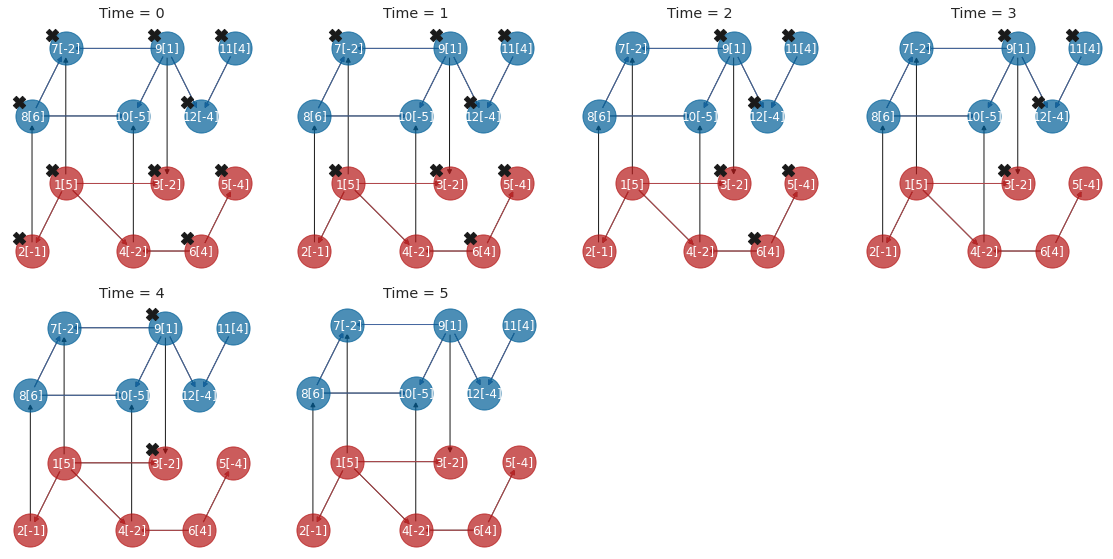

--Running JC: OPTIMISTIC, resource allocation: AUCTION
auction type: MCA, valuation: DTC
-Time Step (JC) 1 / 7
-Time Step (JC) 2 / 7
-Time Step (JC) 3 / 7
-Time Step (JC) 4 / 7
-Time Step (JC) 5 / 7
-Time Step (JC) 6 / 7
-Time Step (JC) 7 / 7
--Running JC: OPTIMISTIC, resource allocation: UNIFORM
-Time Step (JC) 1 / 7
-Time Step (JC) 2 / 7
-Time Step (JC) 3 / 7
-Time Step (JC) 4 / 7
-Time Step (JC) 5 / 7
-Time Step (JC) 6 / 7
-Time Step (JC) 7 / 7


Plot restoration plan by JC OPTIMISTIC MCA DTC


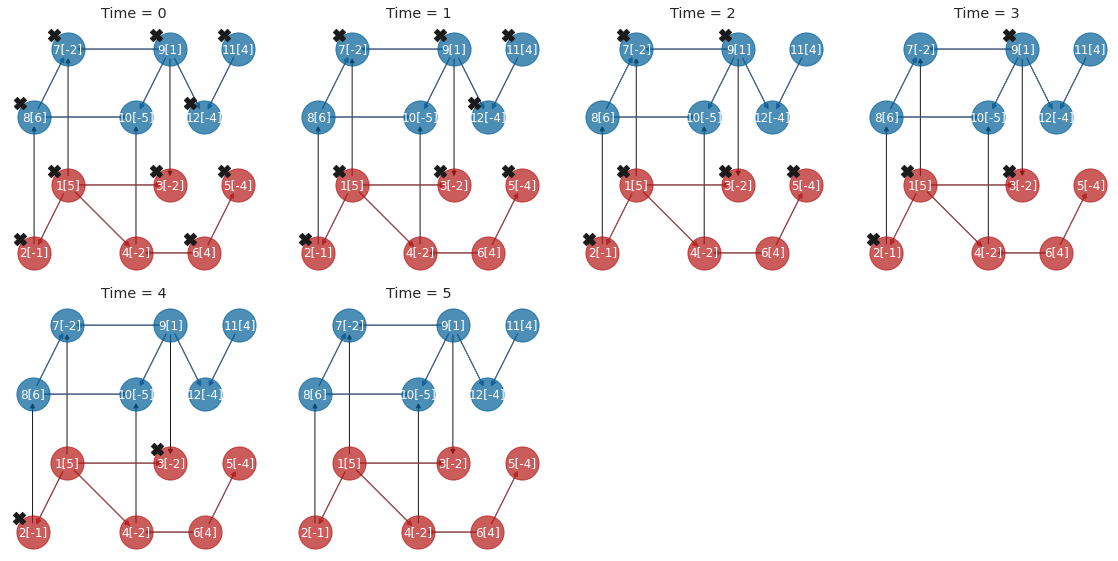



Plot restoration plan by JC OPTIMISTIC UNIFORM DTC


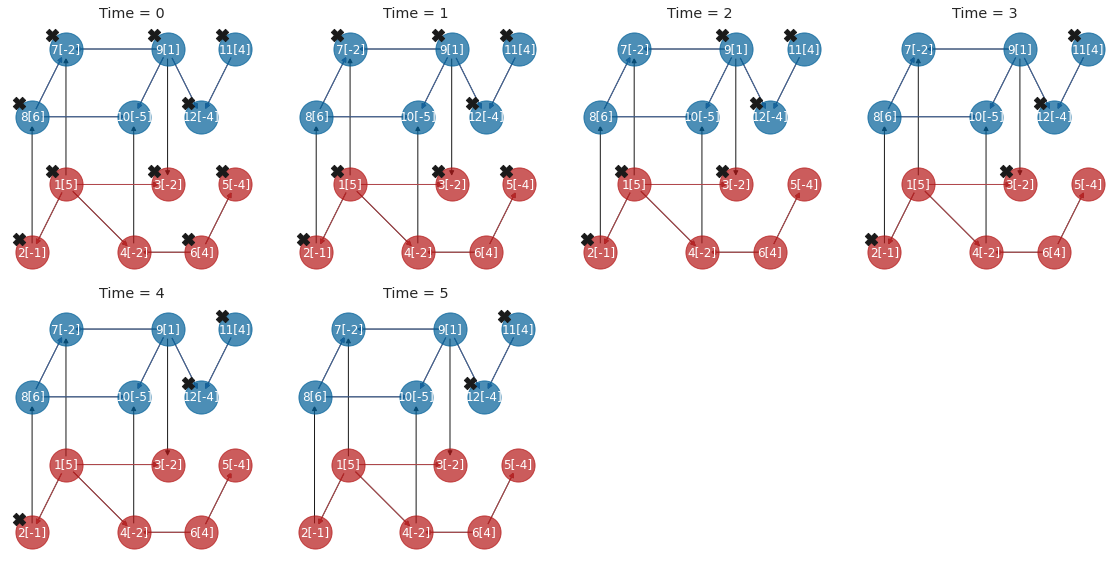

--Running Game: NORMALGAME, resource allocation: AUCTION
auction type: MCA, valuation: DTC
-Time Step 1 / 7
-Time Step 2 / 7
-Time Step 3 / 7
-Time Step 4 / 7
-Time Step 5 / 7
-Time Step 6 / 7
-Time Step 7 / 7
--Running Game: NORMALGAME, resource allocation: UNIFORM
-Time Step 1 / 7
-Time Step 2 / 7
-Time Step 3 / 7
-Time Step 4 / 7
-Time Step 5 / 7
-Time Step 6 / 7
-Time Step 7 / 7


Plot restoration plan by Game OPTIMISTIC MCA DTC


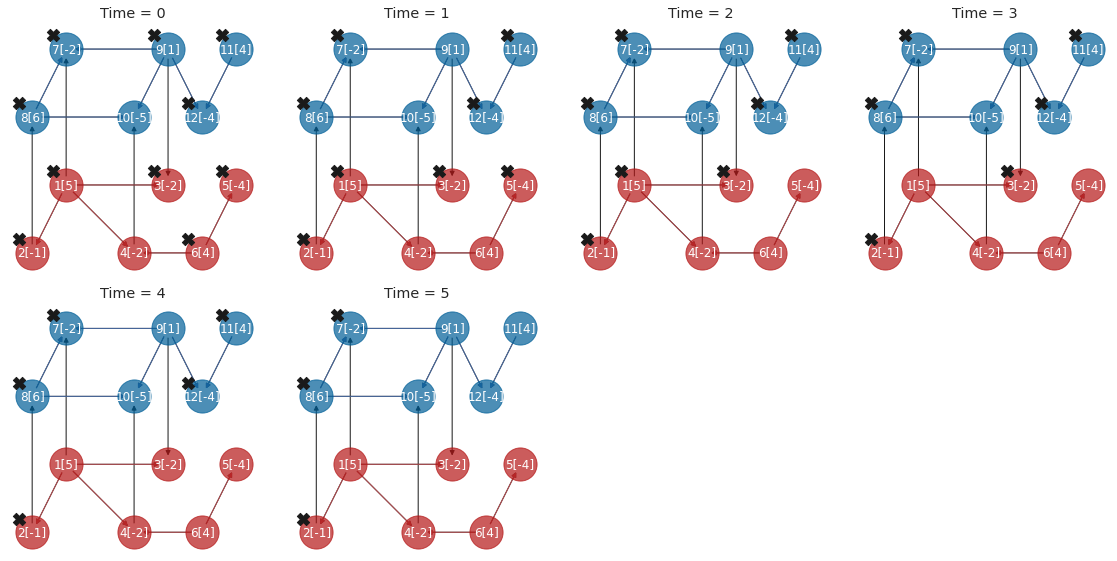



Plot restoration plan by Game OPTIMISTIC UNIFORM DTC


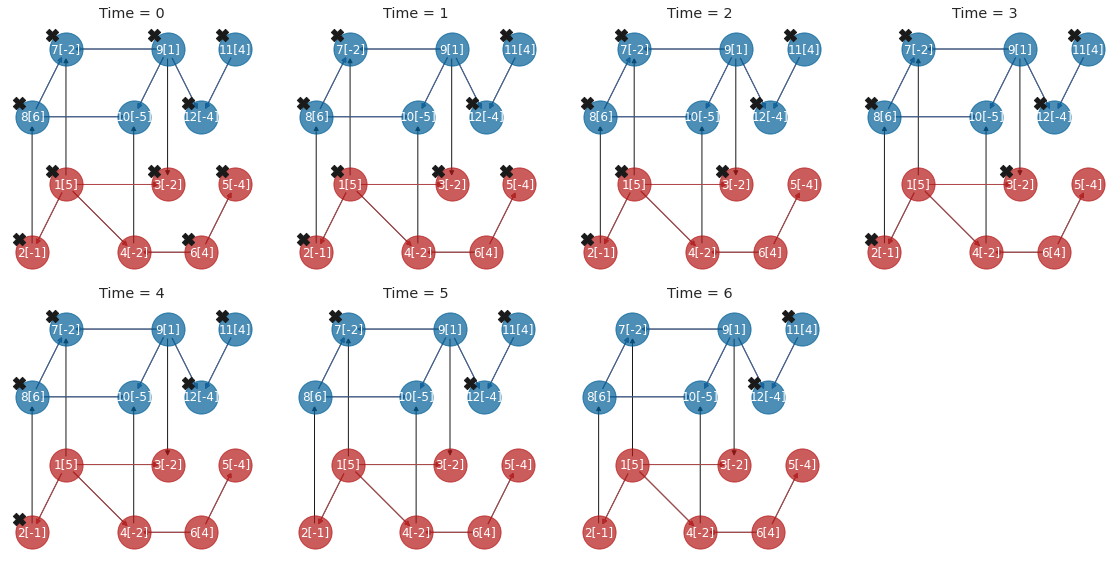

In [3]:
# Run methods
run_main.run_indp_sample(layers)
run_main.run_jc_sample(layers, judge_types, auction_type, valuation_type)
run_main.run_game_sample(layers, judge_types, auction_type, valuation_type)

In [4]:
# Read results
COMBS = []
OPTIMAL_COMBS = [[0, 0, len(layers), len(layers), 'indp_sample_12Node', 'nan',
                  'nan', 'nan', '']]
for jt, rst, vt in itertools.product(judge_types, auction_type, valuation_type):
    if rst == 'UNIFORM':
        COMBS.append([0, 0, len(layers), len(layers), 'jc_sample_12Node', jt, rst, 'nan', 'real'])
        COMBS.append([0, 0, len(layers), len(layers), 'ng_sample_12Node', jt, rst, 'nan', ''])
    else:
        COMBS.append([0, 0, len(layers), len(layers), 'jc_sample_12Node', jt, rst, vt, 'real'])
        COMBS.append([0, 0, len(layers), len(layers), 'ng_sample_12Node', jt, rst, vt, ''])
BASE_DF, objs = dindputils.read_results(COMBS, OPTIMAL_COMBS, ['Total'],
                                    root_result_dir='../results/', deaggregate=True)
LAMBDA_DF = dindputils.relative_performance(BASE_DF, COMBS, OPTIMAL_COMBS,
                                        ref_method='indp_sample_12Node', cost_type='Total')
RES_ALLOC_DF, ALLOC_GAP_DF = dindputils.read_resourcec_allocation(BASE_DF, COMBS, OPTIMAL_COMBS,
                                                              objs, root_result_dir='../results/',
                                                              ref_method='indp_sample_12Node')


Aggregating Results
[####################] 100.0%
Ref area calculation
[####################] 100.0%
Lambda calculation
[####################] 100.0%
Resource allocation
[####################] 100.0%
Allocation Gap
[####################] 100.0%

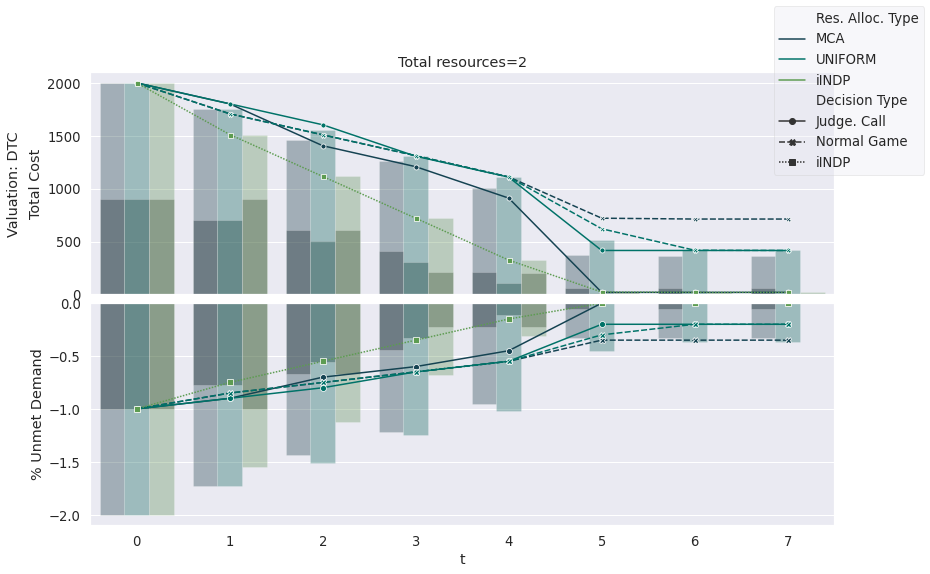

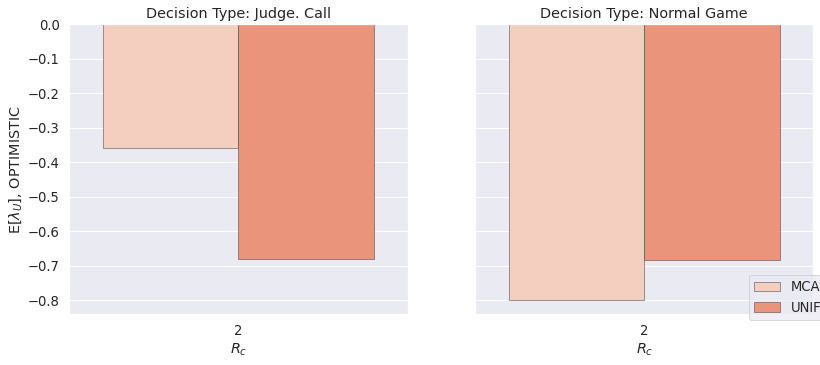

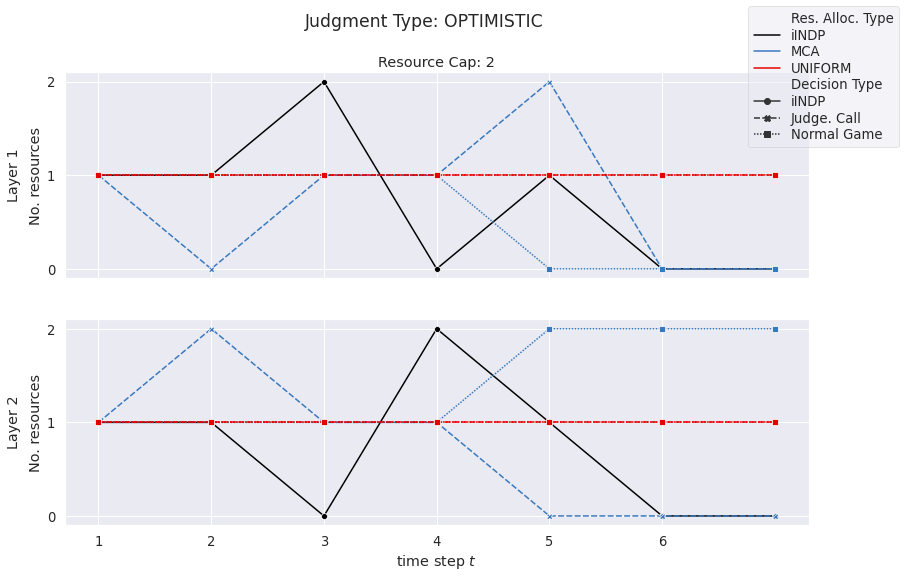

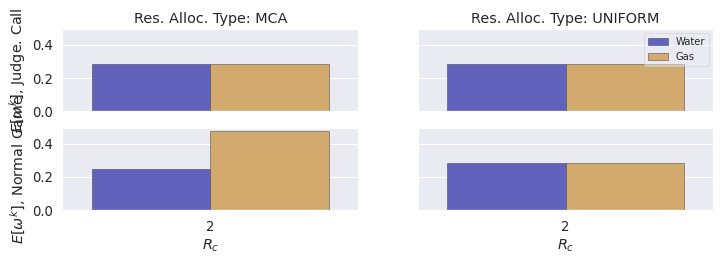

In [5]:
# Plot results
plots.plot_performance_curves(BASE_DF, cost_type='Total', ci=None,
                              deaggregate=True, plot_resilience=True)
plots.plot_relative_performance(LAMBDA_DF, lambda_type='U')
plots.plot_auction_allocation(RES_ALLOC_DF, ci=None)
plots.plot_relative_allocation(ALLOC_GAP_DF, distance_type='gap')